In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/Machine_Learning/UAS/FishImgDataset-20250607T055530Z-1-001.zip'

In [ ]:
!unzip -d /content/ "$file_path"

Streaming output truncated to the last 5000 lines.
  inflating: /content/FishImgDataset/train/Grass Carp/Rohu_14_jpg.rf.6b93c2520e92411bf95752fc8d841796.jpg  
  inflating: /content/FishImgDataset/train/Grass Carp/Rohu_136_jpg.rf.308f6f919d2c6afdcecb693f8c8ec4ff.jpg  
  inflating: /content/FishImgDataset/train/Perch/119256-220mm.jpg  
  inflating: /content/FishImgDataset/train/Grass Carp/Rohu_176_jpg.rf.6abd4cc1b212d6baf9a545e5793fea41.jpg  
  inflating: /content/FishImgDataset/train/Grass Carp/Rohu_165_jpg.rf.fb0386e6e9ff0f9a09b3b8ef166e43fb.jpg  
  inflating: /content/FishImgDataset/train/Grass Carp/Rohu_169_jpg.rf.05085f1096f76ce41097bb78d6f2250a.jpg  
  inflating: /content/FishImgDataset/train/Grass Carp/Rohu_166_jpg.rf.9bf057128f46dbc4aace010195cb9e83.jpg  
  inflating: /content/FishImgDataset/train/Grass Carp/Rohu_139_jpg.rf.deb268d3466a3965e37214b3838e737a.jpg  
  inflating: /content/FishImgDataset/train/Grass Carp/Rohu_200_jpg.rf.b633a26073e6e148eb6e19c24d32817c.jpg  
  inflatin

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [ ]:
# Define image dimensions and batch size
img_height, img_width = 180, 180
batch_size = 32

# Define dataset directories
base_directory = '/content/FishImgDataset'
train_directory = f'{base_directory}/train'
validation_directory = f'{base_directory}/val'
test_directory = f'{base_directory}/test'

print(f"Train data path: {train_directory}")
print(f"Validation data path: {validation_directory}")
print(f"Test data path: {test_directory}")

# Load image datasets
train_data = tf.keras.utils.image_dataset_from_directory(
    train_directory,
    label_mode='int',
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

validation_data = tf.keras.utils.image_dataset_from_directory(
    validation_directory,
    label_mode='int',
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

test_data = tf.keras.utils.image_dataset_from_directory(
    test_directory,
    label_mode='int',
    image_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=False
)

# Get class names and count
class_names = train_data.class_names
print(f"Discovered classes: {class_names}")
number_of_classes = len(class_names)

Train data path: /content/FishImgDataset/train
Validation data path: /content/FishImgDataset/val
Test data path: /content/FishImgDataset/test
Found 8819 files belonging to 31 classes.
Found 2751 files belonging to 31 classes.
Found 1761 files belonging to 31 classes.
Discovered classes: ['Bangus', 'Big Head Carp', 'Black Spotted Barb', 'Catfish', 'Climbing Perch', 'Fourfinger Threadfin', 'Freshwater Eel', 'Glass Perchlet', 'Goby', 'Gold Fish', 'Gourami', 'Grass Carp', 'Green Spotted Puffer', 'Indian Carp', 'Indo-Pacific Tarpon', 'Jaguar Gapote', 'Janitor Fish', 'Knifefish', 'Long-Snouted Pipefish', 'Mosquito Fish', 'Mudfish', 'Mullet', 'Pangasius', 'Perch', 'Scat Fish', 'Silver Barb', 'Silver Carp', 'Silver Perch', 'Snakehead', 'Tenpounder', 'Tilapia']


# Konfigurasi dataset untuk performa

In [ ]:
AUTO_TUNE = tf.data.AUTOTUNE
train_ds_optimized = train_data.cache().shuffle(1000).prefetch(buffer_size=AUTO_TUNE)
val_ds_optimized = validation_data.cache().prefetch(buffer_size=AUTO_TUNE)
test_ds_optimized = test_data.cache().prefetch(buffer_size=AUTO_TUNE)


augmentation_layer = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
])

normalization_layer = tf.keras.layers.Rescaling(1./255)

# CNN Model

In [ ]:

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    augmentation_layer,
    normalization_layer,
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

epochs = 20
history = model.fit(
    train_ds_optimized,
    validation_data=val_ds_optimized,
    epochs=epochs
)

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_2 (Sequential)       │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_2 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 178, 178, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 89, 89, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 87, 87, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 43, 43, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 41, 41, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 20, 20, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 25600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 25600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │     3,276,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 31)             │         3,999 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,511 (12.61 MB)

 Trainable params: 3,304,511 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
276/276 ━━━━━━━━━━━━━━━━━━━━ 334s 1s/step - accuracy: 0.1888 - loss: 3.0721 - val_accuracy: 0.2570 - val_loss: 2.8682
Epoch 2/20
276/276 ━━━━━━━━━━━━━━━━━━━━ 331s 1s/step - accuracy: 0.3294 - loss: 2.3379 - val_accuracy: 0.4028 - val_loss: 2.0785
Epoch 3/20
276/276 ━━━━━━━━━━━━━━━━━━━━ 331s 1s/step - accuracy: 0.4134 - loss: 2.0395 - val_accuracy: 0.4446 - val_loss: 1.9262
Epoch 4/20
276/276 ━━━━━━━━━━━━━━━━━━━━ 396s 1s/step - accuracy: 0.4605 - loss: 1.8519 - val_accuracy: 0.4580 - val_loss: 1.8838
Epoch 5/20
276/276 ━━━━━━━━━━━━━━━━━━━━ 328s 1s/step - accuracy: 0.5036 - loss: 1.7254 - val_accuracy: 0.5503 - val_loss: 1.5556
Epoch 6/20
276/276 ━━━━━━━━━━━━━━━━━━━━ 380s 1s/step - accuracy: 0.5330 - loss: 1.6052 - val_accuracy: 0.5631 - val_loss: 1.5381
Epoch 7/20
276/276 ━━━━━━━━━━━━━━━━━━━━ 328s 1s/step - accuracy: 0.5564 - loss: 1.5135 - val_accuracy: 0.5711 - val_loss: 1.4613
Epoch 8/20
276/276 ━━━━━━━━━━━━━━━━━━━━ 331s 1s/step - accuracy: 0.5825 - loss: 1.4177 - val_accu

56/56 ━━━━━━━━━━━━━━━━━━━━ 32s 579ms/step - accuracy: 0.7538 - loss: 0.8289
Test Accuracy: 0.77
56/56 ━━━━━━━━━━━━━━━━━━━━ 15s 268ms/step

Classification Report:
                       precision    recall  f1-score   support

               Bangus       0.58      0.53      0.55        34
        Big Head Carp       0.85      0.53      0.66        43
   Black Spotted Barb       0.67      0.82      0.74        40
              Catfish       0.76      0.73      0.74        62
       Climbing Perch       0.69      0.60      0.64        30
 Fourfinger Threadfin       0.76      0.74      0.75        38
       Freshwater Eel       0.76      0.64      0.69        55
       Glass Perchlet       0.90      0.74      0.81        77
                 Goby       0.77      0.81      0.79       124
            Gold Fish       0.95      0.98      0.96        41
              Gourami       0.94      0.94      0.94        63
           Grass Carp       0.85      0.97      0.90       238
 Green Spotted Puf

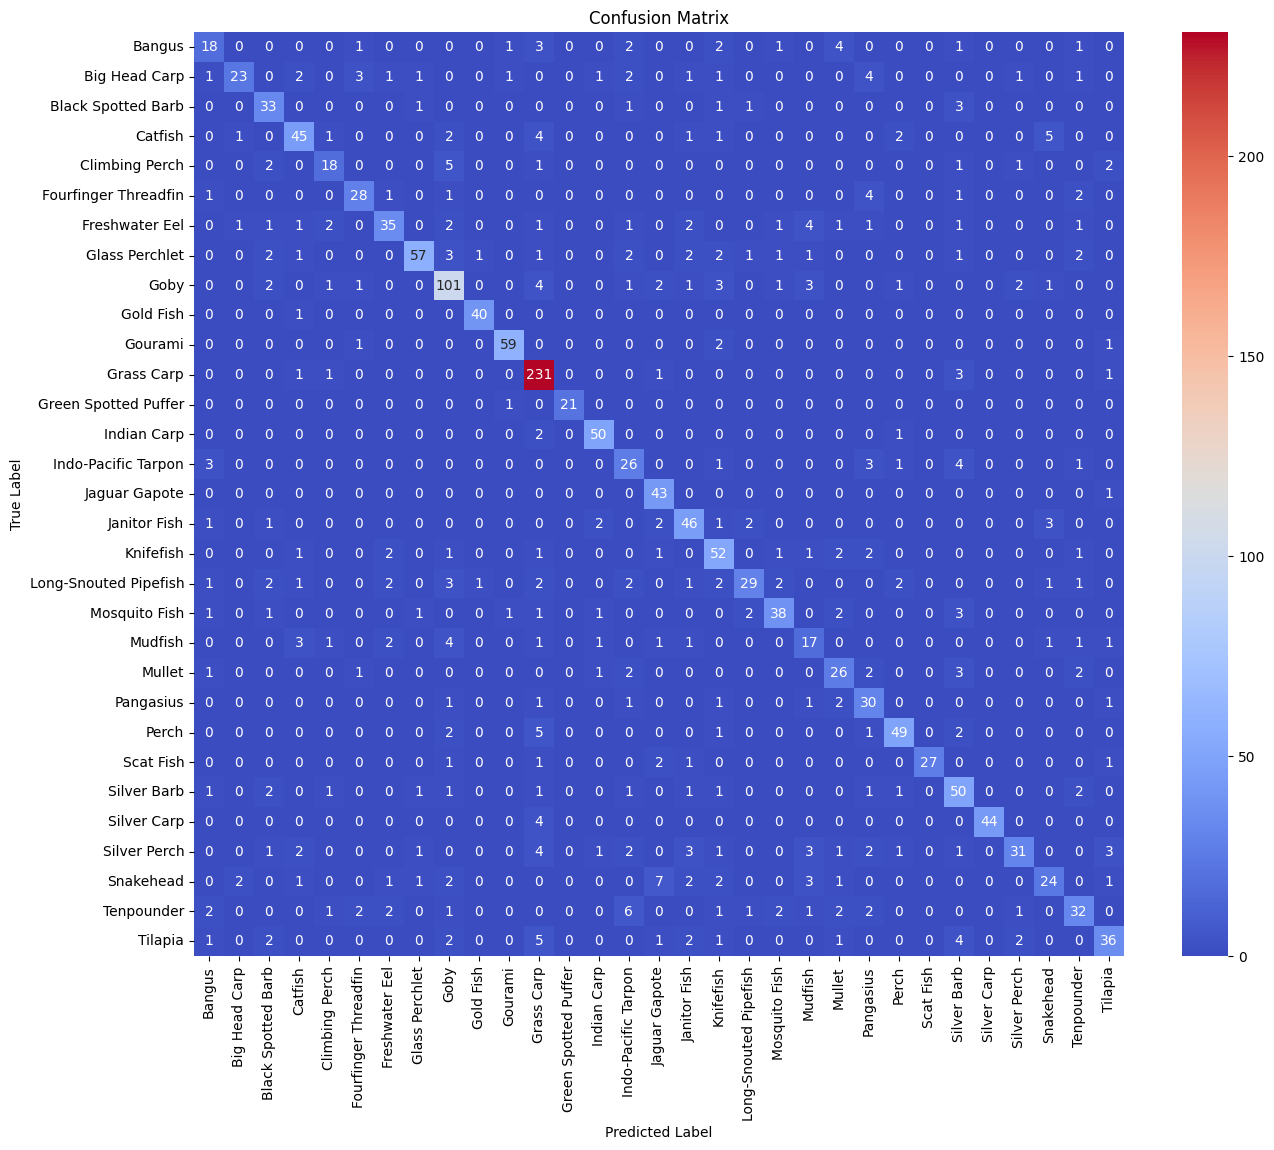

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluate the model on the test dataset
loss, accuracy = model.evaluate(test_ds_optimized)
print(f"Test Accuracy: {accuracy:.2f}")

# Get predictions for the test dataset
y_pred_probs = model.predict(test_ds_optimized)
y_pred = np.argmax(y_pred_probs, axis=1)

# Get the true labels for the test dataset
# Flatten the dataset to get all true labels
y_true = np.concatenate([y for x, y in test_ds_optimized], axis=0)

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

# Calculate and print the AUC-ROC score
# Use 'ovr' for multi-class AUC
auc_roc = roc_auc_score(y_true, y_pred_probs, multi_class='ovr')
print(f"\nAUC-ROC Score (One-vs-Rest): {auc_roc:.2f}")

# Generate and display the confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(15, 12))

sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### Matriks Evaluasi Global

Kinerja model secara keseluruhan:

| Matriks Evaluasi          | Nilai |
| :------------------------ | :---- |
| Akurasi                   | 0.77  |
| *Macro Average F1-Score* | 0.75  |
| *Weighted Average F1-Score* | 0.77  |


### Penjelasan Metrik Evaluasi

1.  **Akurasi**
    * Akurasi 0.77 menunjukkan bahwa 77% prediksi model pada data uji sesuai dengan label yang benar.
    * Metrik ini mudah dipahami dan representatif jika distribusi kelas pada dataset seimbang.
    * Namun, pada klasifikasi multikelas dengan distribusi data tidak merata, seperti yang terindikasi pada dataset ini, akurasi kurang mampu menggambarkan kinerja model secara menyeluruh.

2.  ***Macro Average F1-Score***
    * *Macro Average F1-Score* berada di angka 0.75.
    * Metrik ini merupakan rata-rata *F1-Score* dari setiap kelas, tanpa mempertimbangkan jumlah sampel per kelas (*support*).
    * Oleh karena itu, *macro average F1-Score* lebih relevan untuk mengevaluasi kinerja model secara seimbang di seluruh kelas, termasuk kelas minoritas.

3.  ***Weighted Average F1-Score***
    * *Weighted Average F1-Score* mencapai 0.77.
    * Metrik ini dihitung dengan membobot *F1-Score* setiap kelas berdasarkan jumlah sampel di masing-masing kelasnya.
    * Dengan demikian, *weighted average F1-Score* lebih merepresentasikan kondisi nyata performa model terhadap keseluruhan data uji, karena memperhitungkan distribusi data yang ada.

### Matriks Evaluasi Terbaik

Berdasarkan hasil evaluasi ini, *F1-Score* (baik dalam bentuk *macro average* maupun *weighted average*) adalah metrik yang paling sesuai untuk menilai kinerja model pada skenario klasifikasi multikelas dengan distribusi data yang tidak merata. Kemampuan *F1-Score* dalam menyeimbangkan *precision* dan *recall* di setiap kelas menjadikannya pilihan yang kuat.

Dalam memilih antara *macro* dan *weighted average F1-Score*, pertimbangkan tujuan evaluasi:
* Jika tujuan adalah memastikan performa yang setara di semua kelas, termasuk kelas minoritas, *macro average* lebih tepat.
* Jika yang ingin dinilai adalah performa model secara keseluruhan dengan mempertimbangkan proporsi jumlah data, *weighted average* dapat digunakan.

Secara ringkas, *F1-Score* adalah indikator kinerja yang paling relevan dalam evaluasi model ini.